In [51]:
fn = "grafo_conexoes.net.gz"
from graph_tool import Graph
import pandas as pd
import numpy as np
import datetime
import netpixi
from netpixi.data.gt import *
import seaborn as sns
from graph_tool import clustering
sns.set()

In [52]:
g = load_gt(fn)

In [53]:
from graph_tool import centrality

dc = degree_gt(g)
g.vp['degree'] = dc

bc, _ = centrality.betweenness(g)
g.vp['betweenness'] = bc

# cc = centrality.closeness(g, harmonic=True)
# g.vp['closeness'] = cc

# _, ec = centrality.eigenvector(g)
# g.vp['eigenvector'] = ec

c = clustering.local_clustering(g)
g.vp['clustering_coefficient'] = c

df3 = pd.DataFrame({k: list(v) for k, v in g.vp.items()}).rename({"IBGE_15-59":"IBGE_WORK"}, axis=1)
df3["URB"] = df3["IBGE_DU_URBAN"]/df3["IBGE_DU"]
df3

,id,CITY_STATE,IBGE_DU,IBGE_DU_URBAN,IBGE_POP,IBGE_WORK,IDHM,GDP,GDP_CAPITA,degree,betweenness,clustering_coefficient,URB
0,0,Abadiânia - GO,4655.0,3233.0,10656.0,6896.0,0.690,287984.49,15628.40,0.001223,1.312806e-07,0.700000,0.694522
1,1,Abaeté - MG,7694.0,6667.0,18464.0,11979.0,0.698,430235.36,18250.42,0.004403,2.365389e-04,0.562092,0.866519
2,2,Abaetetuba - PA,31061.0,19057.0,82956.0,53516.0,0.628,1249255.29,8222.36,0.002691,1.659611e-06,0.472727,0.613535
3,3,Abaiara - CE,2791.0,1251.0,4538.0,2631.0,0.628,73151.46,6370.41,0.000734,0.000000e+00,1.000000,0.448226
4,4,Abaíra - BA,2572.0,1193.0,3725.0,2319.0,0.603,64324.59,6982.70,0.004892,2.447182e-05,0.452632,0.463841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,4084,Xique-Xique - BA,11637.0,8461.0,32497.0,19371.0,0.585,342261.06,7089.97,0.008072,7.552095e-05,0.467803,0.727077
4085,4085,Zabelê - PB,673.0,489.0,1469.0,874.0,0.623,19582.06,8793.02,0.001223,0.000000e+00,1.000000,0.726597
4086,4086,Zacarias - SP,799.0,638.0,1836.0,1165.0,0.730,75934.89,29149.67,0.000734,0.000000e+00,1.000000,0.798498
4087,4087,Zé Doca - MA,11886.0,7611.0,30803.0,18136.0,0.595,380509.30,7489.46,0.010763,9.153418e-05,0.535941,0.640333


In [31]:
df3.sort_values("betweenness", ascending=False)

,id,CITY_STATE,IBGE_DU,IBGE_DU_URBAN,IBGE_POP,IBGE_15-59,IDHM,GDP,GDP_CAPITA,betweenness,clustering_coefficient
3547,3547,São Paulo - SP,3576148.0,3548433.0,10463636.0,7058221.0,0.805,6.870359e+08,57071.43,0.323438,0.026069
456,456,Belo Horizonte - MG,762924.0,762924.0,2263631.0,1553724.0,0.810,8.827746e+07,35122.01,0.075789,0.051679
1442,1442,Goiânia - GO,423365.0,421850.0,1291199.0,899415.0,0.799,4.665922e+07,32209.01,0.054498,0.080991
1366,1366,Fortaleza - CE,711478.0,711478.0,2366137.0,1604565.0,0.754,6.014115e+07,23045.09,0.041387,0.101675
557,557,Brasília - DF,774820.0,751558.0,2450634.0,1683918.0,0.820,2.354971e+08,79099.77,0.041164,0.086179
...,...,...,...,...,...,...,...,...,...,...,...
1867,1867,Itaquaquecetuba - SP,89751.0,89751.0,314720.0,208097.0,0.710,6.507690e+06,18240.37,0.000000,0.000000
1871,1871,Itaquitinga - PE,4319.0,3311.0,11691.0,7313.0,0.586,1.306565e+05,7774.40,0.000000,1.000000
3290,3290,Ribeirão Vermelho - MG,1215.0,1124.0,3532.0,2307.0,0.737,1.001200e+02,24768.93,0.000000,1.000000
1885,1885,Itatuba - PB,2837.0,1667.0,5066.0,3045.0,0.562,9.590490e+04,8872.69,0.000000,1.000000


In [54]:
df3["GDP_Scaled"] = df3["GDP"].apply(np.log)

In [6]:
# Surpreendentemente estável
# r = netpixi.render(fn, infinite=True);

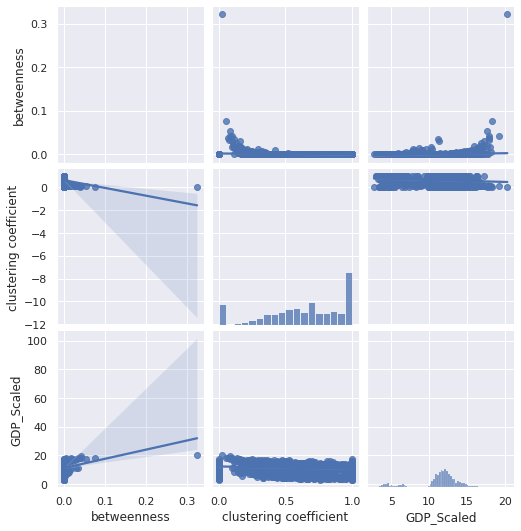

In [20]:
sns.pairplot(df3[["betweenness", "clustering coefficient", "GDP_Scaled"]], kind='reg')

In [ ]:
sns.regplot(df3[])

In [64]:
import statsmodels.formula.api as smf

model = smf.ols(data=df3, formula='GDP_CAPITA ~ betweenness+IDHM+clustering_coefficient+IBGE_WORK+URB') # z1 é explicada por x1?
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             GDP_CAPITA   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     293.0
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          1.49e-268
Time:                        14:46:52   Log-Likelihood:                -45777.
No. Observations:                4089   AIC:                         9.157e+04
Df Residuals:                    4083   BIC:                         9.160e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.886e+04   2860.755    -27.565      0.000   -8.45e+04   -7.32e+04
betweenness             -2.69e+05   1.62e+05     -1.661      0.097   -5.86e+05    4.85e+04
IDHM                    1.529e+05   4775.163     32.013      0.000    1.44e+05    1.62e+05
clustering_coefficient  2095.1809    944.613      2.218      0.027     243.225    3947.137
IBGE_WORK                  0.0127      0.007      1.838      0.066      -0.001       0.026
URB                    -3565.2611   1633.313     -2.183      0.029   -6767.444    -363.078
==============================================================================
Omnibus:                     5048.416   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           888866.923
Skew:                           6.575   Prob(JB):                         0.00
Kurtosis:                      74.022   Cond. No.                     7.92e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
model = smf.ols(data=df3, formula='GDP ~ IDHM+URB+degree') # z1 é explicada por x1?
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     823.3
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:41:47   Log-Likelihood:                -71474.
No. Observations:                4089   AIC:                         1.430e+05
Df Residuals:                    4085   BIC:                         1.430e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.48e+06   1.46e+06      1.704      0.089   -3.74e+05    5.33e+06
IDHM       -3.992e+06   2.57e+06     -1.555      0.120   -9.02e+06    1.04e+06
URB        -4.213e+06   8.76e+05     -4.807      0.000   -5.93e+06   -2.49e+06
degree      7.661e+08   1.57e+07     48.703      0.000    7.35e+08    7.97e+08
==============================================================================
Omnibus:                    10677.415   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        354319926.555
Skew:                          29.677   Prob(JB):                         0.00
Kurtosis:                    1443.876   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

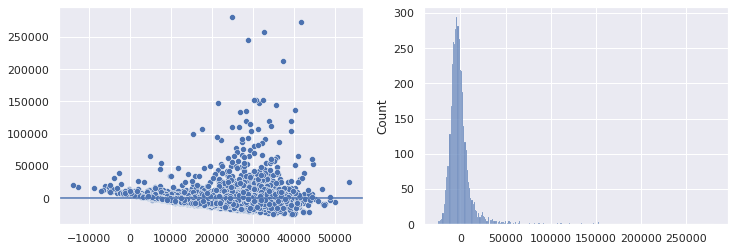

In [65]:
from matplotlib import rcParams
import matplotlib.pyplot as plt

def linear_resplot(result):
    width, height = rcParams['figure.figsize']
    fig, axs = plt.subplots(1, 2, figsize=(2 * width, height))
    ax = sns.scatterplot(x=result.fittedvalues, y=result.resid, ax=axs[0])
    ax.axhline(0)
    sns.histplot(result.resid, ax=axs[1])
    plt.show()

linear_resplot(result)